## All required imports

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

import seaborn as sns
sns.set_style('whitegrid')

import plotly
from plotly.offline import iplot
import plotly.graph_objs as go

import cufflinks as cf
cf.go_offline()

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Data processing (Data Cleaning & feature selection)

### 1. SDR Data

In [2]:
# Loading Raw Data
df = pd.read_excel("Data/Data.xlsx", index_col=0)
df

Algerian dinar   (DZD)                       \
Date                                                      
2016-01-04                                     0.006710   
2016-01-05                                     0.006723   
2016-01-06                                     0.006723   
2016-01-07                                     0.006725   
2016-01-08                                     0.006717   
...                                                 ...   
2021-12-17                                     0.005148   
2021-12-20                                     0.005150   
2021-12-21                                     0.005151   
2021-12-22                                     0.005145   
2021-12-23                                          NaN   

            Australian dollar   (AUD)                       \
Date                                                         
2016-01-04                                        0.520544   
2016-01-05                                        0.522630   
2016-01-06                                        0.516299   
2016-01-07                                        0.508623   
2016-01-08                                        0.510064   
...                                                    ...   
2021-12-17                                        0.512476   
2021-12-20                                        0.509316   
2021-12-21                                        0.509225   
2021-12-22                                        0.510355   
2021-12-23                                        0.515149   

            Botswana pula   (BWP)                       \
Date                                                     
2016-01-04                                    0.064140   
2016-01-05                                    0.064223   
2016-01-06                                    0.063713   
2016-01-07                                    0.063135   
2016-01-08                                    0.063352   
...                                                ...   
2021-12-17                                    0.060994   
2021-12-20                                    0.060897   
2021-12-21                                    0.061210   
2021-12-22                                    0.060888   
2021-12-23                                    0.061232   

            Brazilian real   (BRL)                       \
Date                                                      
2016-01-04                                     0.184561   
2016-01-05                                     0.179481   
2016-01-06                                     0.180693   
2016-01-07                                     0.179236   
2016-01-08                                     0.178473   
...                                                 ...   
2021-12-17                                     0.125551   
2021-12-20                                     0.125583   
2021-12-21                                     0.124794   
2021-12-22                                     0.125096   
2021-12-23                                     0.125561   

            Brunei dollar   (BND)                       \
Date                                                     
2016-01-04                                    0.506341   
2016-01-05                                    0.508786   
2016-01-06                                    0.506380   
2016-01-07                                    0.503045   
2016-01-08                                    0.503849   
...                                                ...   
2021-12-17                                    0.523769   
2021-12-20                                    0.523903   
2021-12-21                                    0.524090   
2021-12-22                                    0.524203   
2021-12-23                                    0.524784   

            Canadian dollar   (CAD)                       \
Date                                                       
2016-01-04                             

In [3]:
df.isnull().sum()    # Checking for number of missing values

Algerian dinar   (DZD)                               97
Australian dollar   (AUD)                            61
Botswana pula   (BWP)                                83
Brazilian real   (BRL)                               46
Brunei dollar   (BND)                                85
Canadian dollar   (CAD)                              95
Chilean peso   (CLP)                                 79
Chinese yuan   (CNY)                                 94
Colombian peso   (COP)                               91
Czech koruna   (CZK)                                 59
Danish krone   (DKK)                                 70
Euro   (EUR)                                         18
Indian rupee   (INR)                                122
Israeli New Shekel   (ILS)                          102
Japanese yen   (JPY)                                 79
Korean won   (KRW)                                   87
Kuwaiti dinar   (KWD)                               205
Malaysian ringgit   (MYR)                       

In [4]:
df = df.fillna(method="ffill")    # To fill the timeseries missingh data with previous Data
df = df.fillna(method="bfill")    # To fill only the first missing value with next Data
df.isnull().sum().sum()

0

In [5]:
df.columns

Index(['Algerian dinar   (DZD)                     ',
       'Australian dollar   (AUD)                     ',
       'Botswana pula   (BWP)                     ',
       'Brazilian real   (BRL)                     ',
       'Brunei dollar   (BND)                     ',
       'Canadian dollar   (CAD)                     ',
       'Chilean peso   (CLP)                     ',
       'Chinese yuan   (CNY)                     ',
       'Colombian peso   (COP)                     ',
       'Czech koruna   (CZK)                     ',
       'Danish krone   (DKK)                     ',
       'Euro   (EUR)                     ',
       'Indian rupee   (INR)                     ',
       'Israeli New Shekel   (ILS)                     ',
       'Japanese yen   (JPY)                     ',
       'Korean won   (KRW)                     ',
       'Kuwaiti dinar   (KWD)                     ',
       'Malaysian ringgit   (MYR)                     ',
       'Mauritian rupee   (MUR)               

In [6]:
import re
def extract_values(text):
    pattern = r'\((.*?)\)'
    values = re.findall(pattern, text)
    return values
a = dict()
for i in df.columns:
    a[i] = i if extract_values(i) == [] else extract_values(i)[0]
  
df.rename(a, axis=1, inplace=True)    # Renaming the columns names with only their currency name
df

DZD       AUD       BWP       BRL       BND       CAD  \
Date                                                                     
2016-01-04  0.006710  0.520544  0.064140  0.184561  0.506341  0.515910   
2016-01-05  0.006723  0.522630  0.064223  0.179481  0.508786  0.518022   
2016-01-06  0.006723  0.516299  0.063713  0.180693  0.506380  0.514650   
2016-01-07  0.006725  0.508623  0.063135  0.179236  0.503045  0.513742   
2016-01-08  0.006717  0.510064  0.063352  0.178473  0.503849  0.510471   
...              ...       ...       ...       ...       ...       ...   
2021-12-17  0.005148  0.512476  0.060994  0.125551  0.523769  0.556632   
2021-12-20  0.005150  0.509316  0.060897  0.125583  0.523903  0.553576   
2021-12-21  0.005151  0.509225  0.061210  0.124794  0.524090  0.553808   
2021-12-22  0.005145  0.510355  0.060888  0.125096  0.524203  0.556148   
2021-12-23  0.005145  0.515149  0.061232  0.125561  0.524784  0.556148   

                 CLP       CNY       COP       CZK  ...       SGD       ZAR  \
Date                                                ...                       
2016-01-04  0.001015  0.110659  0.000229  0.029066  ...  0.506341  0.046369   
2016-01-05  0.001011  0.111183  0.000226  0.028827  ...  0.508786  0.046369   
2016-01-06  0.001014  0.110623  0.000226  0.028768  ...  0.506380  0.045834   
2016-01-07  0.001014  0.109555  0.000222  0.029042  ...  0.503045  0.044869   
2016-01-08  0.001001  0.109636  0.000220  0.029042  ...  0.503849  0.045201   
...              ...       ...       ...       ...  ...       ...       ...   
2021-12-17  0.000842  0.112212  0.000179  0.032066  ...  0.523769  0.045137   
2021-12-20  0.000846  0.112324  0.000179  0.032014  ...  0.523903  0.045197   
2021-12-21  0.000829  0.112359  0.000179  0.032035  ...  0.524090  0.045170   
2021-12-22  0.000824  0.112259  0.000179  0.032027  ...  0.524203  0.045058   
2021-12-23  0.000825  0.112158  0.000179  0.032216  ...  0.524784  0.047028   

                 SEK       CHF       THB       TTD       AED       GBP  \
Date                                                                     
2016-01-04  0.085704  0.721685  0.019929  0.112887  0.196236  1.064440   
2016-01-05  0.085161  0.717691  0.020065  0.112887  0.197377  1.063310   
2016-01-06  0.085161  0.718581  0.020014  0.112829  0.197368  1.062820   
2016-01-07  0.084140  0.722156  0.019900  0.112381  0.196698  1.052210   
2016-01-08  0.085012  0.722946  0.019936  0.112734  0.196697  1.054800   
...              ...       ...       ...       ...       ...       ...   
2021-12-17  0.079100  0.777566  0.021421  0.105541  0.194801  0.950087   
2021-12-20  0.078342  0.775660  0.021391  0.105821  0.195082  0.945806   
2021-12-21  0.078409  0.776261  0.021255  0.105821  0.194937  0.948326   
2021-12-22  0.078187  0.775299  0.021188  0.105660  0.194822  0.952668   
2021-12-23  0.078374  0.776454  0.021269  0.105660  0.194552  0.959850   

                 USD       UYU  
Date                            
2016-01-04  0.720675  0.024011  
2016-01-05  0.724868  0.024011  
2016-01-06  0.724833  0.024011  
2016-01-07  0.722373  0.024011  
2016-01-08  0.722368  0.023704  
...              ...       ...  
2021-12-17  0.715050  0.016118  
2021-12-20  0.716438  0.016159  
2021-12-21  0.715907  0.016159  
2021-12-22  0.715485  0.016121  
2021-12-23  0.714493  0.016092  

[1485 rows x 39 columns]

In [7]:
from sklearn.feature_selection import VarianceThreshold

threshold_value = 0.0000001
selector = VarianceThreshold(threshold=threshold_value)

selector.fit(df)
selected_features = selector.get_support(indices=True)
selected_columns = df.columns[selected_features]
data_selected = selector.transform(df)
data_selected_df = pd.DataFrame(data_selected, columns=selected_columns)

print("Selected Features:")
print(data_selected_df.head())
data_selected_df.columns

Selected Features:
        DZD       AUD       BWP       BRL       BND       CAD       CNY  \
0  0.006710  0.520544  0.064140  0.184561  0.506341  0.515910  0.110659   
1  0.006723  0.522630  0.064223  0.179481  0.508786  0.518022  0.111183   
2  0.006723  0.516299  0.063713  0.180693  0.506380  0.514650  0.110623   
3  0.006725  0.508623  0.063135  0.179236  0.503045  0.513742  0.109555   
4  0.006717  0.510064  0.063352  0.178473  0.503849  0.510471  0.109636   

        CZK       DKK       EUR  ...       SGD       ZAR       SEK       CHF  \
0  0.029066  0.105253  0.785392  ...  0.506341  0.046369  0.085704  0.721685   
1  0.028827  0.104409  0.778943  ...  0.508786  0.046369  0.085161  0.717691   
2  0.028768  0.104368  0.778616  ...  0.506380  0.045834  0.085161  0.718581   
3  0.029042  0.105244  0.785075  ...  0.503045  0.044869  0.084140  0.722156   
4  0.029042  0.105173  0.784564  ...  0.503849  0.045201  0.085012  0.722946   

        THB       TTD       AED      GBP       US

Index(['DZD', 'AUD', 'BWP', 'BRL', 'BND', 'CAD', 'CNY', 'CZK', 'DKK', 'EUR',
       'INR', 'ILS', 'KWD', 'MYR', 'MUR', 'MXN', 'NZD', 'NOK', 'OMR', 'PEN',
       'PHP', 'PLN', 'QAR', 'RUB', 'SAR', 'SGD', 'ZAR', 'SEK', 'CHF', 'THB',
       'TTD', 'AED', 'GBP', 'USD', 'UYU'],
      dtype='object')

### 2. Events Data

In [8]:
eventData = pd.read_excel('Data/event_data.xlsx')
eventData

Events
0    7.0 magnitude earthquake in Haiti - Date: Janu...
1    2010 Nigerien coup d'état - Date: February 18,...
2    2010 Moscow Metro bombings - Date: March 29, 2...
3    Plane crash in Smolensk, Russia - Date: April ...
4    Deepwater Horizon oil spill - Date: April 20, ...
..                                                 ...
173  The World Health Organization endorses the fir...
174  Russia draws international condemnation follow...
175  Barbados becomes a republic on its 55th annive...
176  A truck crash in Chiapas, Mexico, kills 55 mig...
177  Typhoon Rai lashes into Visayas and Mindanao, ...

[178 rows x 1 columns]

In [9]:
# Extracting Country Name in which the event occured and the Date on which it happened

import re

pattern = r'\b(?:Country|Countries|Region|Regions|Planet)\b'
date = r'\b(?:Date|Dates)\b'
date_pattern = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s(?:\d{1,2},?\s)?(?:\d{4}|\d{4}\s?-\s?ongoing|\d{4}\s?-\s?present|\d{4}\s?-\s?\d{4}|January|February|March|April|May|June|July|August|September|October|November|December\s\d{4})'

ls = []
for i in eventData['Events']:
    ls.append(re.split(f'{date}: ', i)[1])

country = []
date_Country = []
for j in ls:
    date_Country.append(re.findall(date_pattern, j))
    country.append(re.split(f'{pattern}: ', j)[1][:-1])

for i in range(len(date_Country)):
    if(len(date_Country[i]) > 0):
        date_Country[i] = pd.to_datetime(date_Country[i][0]).date().isoformat()
    else:
        date_Country[i] = ""

In [10]:
eventData["Date"] = date_Country
eventData["Country"] = country
eventData

Events        Date  \
0    7.0 magnitude earthquake in Haiti - Date: Janu...  2010-01-12   
1    2010 Nigerien coup d'état - Date: February 18,...  2010-02-18   
2    2010 Moscow Metro bombings - Date: March 29, 2...  2010-03-29   
3    Plane crash in Smolensk, Russia - Date: April ...  2010-04-10   
4    Deepwater Horizon oil spill - Date: April 20, ...  2010-04-20   
..                                                 ...         ...   
173  The World Health Organization endorses the fir...  2021-10-06   
174  Russia draws international condemnation follow...  2021-11-15   
175  Barbados becomes a republic on its 55th annive...  2021-11-30   
176  A truck crash in Chiapas, Mexico, kills 55 mig...  2021-12-08   
177  Typhoon Rai lashes into Visayas and Mindanao, ...  2021-12-16   

                                Country  
0                                 Haiti  
1                                 Niger  
2                                Russia  
3                                Russia  
4        United States (Gulf of Mexico)  
..                                  ...  
173                       International  
174                              Russia  
175                            Barbados  
176                              Mexico  
177  Philippines (Visayas and Mindanao)  

[178 rows x 3 columns]

In [11]:
# Set of unique countries
Unique_Countries = []
for i in eventData['Country'].unique():
    if i.find('(') != -1:
        Unique_Countries.append(i[:i.find('(')].strip())
    else:
        Unique_Countries.append(i)

Unique_Countries = list(set(Unique_Countries))
Unique_Countries

['Japan',
 'Nepal, China',
 'United States, Caribbean',
 'Iraq',
 'Belarus',
 'Colombia and Venezuela',
 'North America',
 'Democratic Republic of the Congo',
 'Venezuela, Colombia',
 'Jupiter',
 'Qatar',
 'Somalia',
 'Austria',
 'Cuba',
 'North Korea',
 'Niger',
 'Pakistan',
 'Kenya',
 'Chad',
 'Singapore, North Korea',
 'Ethiopia',
 'Tunisia, Egypt, Libya, Yemen, Bahrain, and others',
 'International waters',
 'Bulgaria',
 'Norway',
 'Mexico',
 'Nigeria',
 'Lebanon',
 'Kyrgyzstan, Tajikistan',
 'Ukraine, Russia',
 'Turkey',
 'United States',
 'Africa',
 'Russia, Kazakhstan, Belarus, Armenia, Kyrgyzstan',
 'Libya',
 'France',
 'New Zealand',
 'Asia-Pacific',
 'Spain',
 'United Kingdom',
 'Malaysia',
 'Indonesia',
 'Egypt',
 'International Space Station',
 'Venezuela',
 'Saudi Arabia',
 'Philippines',
 'Mars',
 'China',
 'South Africa',
 'South Sudan',
 'Portugal',
 'North Korea, South Korea',
 'Bangladesh',
 'Syria',
 'Barbados',
 'El Salvador',
 'Kyrgyzstan',
 'Vatican City',
 'Seneg

In [12]:
# This dictionary we got by prompt engineering from ChatGPT
country_currency_dict = {
    'Libya': 'LYD',
    'New Zealand': 'NZD',
    'United States, Caribbean': 'USD',
    'Russia, Kazakhstan, Belarus, Armenia, Kyrgyzstan': 'RUB, KZT, BYN, AMD, KGS',
    'Portugal': 'EUR',
    'South Africa': 'ZAR',
    'Colombia and Venezuela': 'COP, VES',
    'Austria': 'EUR',
    'Philippines, Vietnam': 'PHP, VND',
    'Australia': 'AUD',
    'Singapore, North Korea': 'SGD, KPW',
    'Nigeria': 'NGN',
    'Malaysia': 'MYR',
    'Tunisia, Egypt, Libya, Yemen, Bahrain, and others': 'TND, EGP, LYD, YER, BHD',
    'Kenya': 'KES',
    'Kyrgyzstan': 'KGS',
    'Haiti': 'HTG',
    'Mars': 'None',
    'Mexico': 'MXN',
    'Spain': 'EUR',
    'Philippines': 'PHP',
    'Asia-Pacific': 'Various',
    'Africa': 'Various',
    'Ukraine': 'UAH',
    'South Korea': 'KRW',
    'Iran': 'IRR',
    'International Space Station': 'Various',
    'Ethiopia': 'ETB',
    'Democratic Republic of the Congo': 'CDF',
    'Israel': 'ILS',
    'Egypt': 'EGP',
    'Senegal, Spain': 'XOF, EUR',
    'Armenia, Azerbaijan': 'AMD, AZN',
    'El Salvador': 'USD',
    'United States': 'USD',
    'Jupiter': 'None',
    'North Korea, South Korea': 'KPW, KRW',
    'Switzerland, Italy': 'CHF, EUR',
    'Venezuela': 'VES',
    'Falkland Islands': 'FKP',
    'Nepal, China': 'NPR, CNY',
    'International': 'Various',
    'Pakistan': 'PKR',
    'India': 'INR',
    'Barbados': 'BBD',
    'Saudi Arabia': 'SAR',
    'Russia': 'RUB',
    'Syria': 'SYP',
    'Venezuela, Colombia': 'VES, COP',
    'Japan': 'JPY',
    'Chad': 'XAF',
    'South Sudan': 'SSP',
    'International waters': 'Various',
    'United Kingdom': 'GBP',
    'Somalia': 'SOS',
    'Belarus': 'BYN',
    'Turkey': 'TRY',
    'Indonesia': 'IDR',
    'Cuba': 'CUP',
    'China': 'CNY',
    'Iraq': 'IQD',
    'Australia, United Kingdom, United States': 'AUD, GBP, USD',
    'Ukraine, Russia': 'UAH, RUB',
    'Bulgaria': 'BGN',
    'North America': 'USD',
    'Afghanistan': 'AFN',
    'Vatican City': 'EUR',
    'Qatar': 'QAR',
    'Niger': 'XOF',
    'Thailand': 'THB',
    'Switzerland': 'CHF',
    'Kyrgyzstan, Tajikistan': 'KGS, TJS',
    'Norway': 'NOK',
    'International release': 'Various',
    'Lebanon': 'LBP',
    'France': 'EUR',
    'Bangladesh': 'BDT',
    'North Korea': 'KPW',
    'Croatia': 'HRK'
}

In [13]:
# Changing the country names to its currency values
for index, row in eventData.iterrows():
    i = row['Country']
    if i.find('(') != -1:
        i = i[:i.find('(')].strip()
    if i in country_currency_dict:
        eventData.at[index, 'Country'] = country_currency_dict[i]
eventData

Events        Date  Country
0    7.0 magnitude earthquake in Haiti - Date: Janu...  2010-01-12      HTG
1    2010 Nigerien coup d'état - Date: February 18,...  2010-02-18      XOF
2    2010 Moscow Metro bombings - Date: March 29, 2...  2010-03-29      RUB
3    Plane crash in Smolensk, Russia - Date: April ...  2010-04-10      RUB
4    Deepwater Horizon oil spill - Date: April 20, ...  2010-04-20      USD
..                                                 ...         ...      ...
173  The World Health Organization endorses the fir...  2021-10-06  Various
174  Russia draws international condemnation follow...  2021-11-15      RUB
175  Barbados becomes a republic on its 55th annive...  2021-11-30      BBD
176  A truck crash in Chiapas, Mexico, kills 55 mig...  2021-12-08      MXN
177  Typhoon Rai lashes into Visayas and Mindanao, ...  2021-12-16      PHP

[178 rows x 3 columns]

In [14]:
event_Countries = []

for i in eventData['Country'].unique():
    if "," in i:
        for j in i.split(","):
            event_Countries.append(j.strip())
    else:
        event_Countries.append(i)
event_Countries = list(set(event_Countries))
print(f"The list of countries for which some event is present in the the event Dataset: \n\n{event_Countries}")

The list of countries for which some event is present in the the event Dataset: 

['YER', 'CHF', 'QAR', 'VND', 'SGD', 'EGP', 'KRW', 'NOK', 'ETB', 'ILS', 'SSP', 'IDR', 'AFN', 'THB', 'IQD', 'None', 'XOF', 'SYP', 'CDF', 'JPY', 'PKR', 'AMD', 'HTG', 'NPR', 'UAH', 'HRK', 'CNY', 'BHD', 'KPW', 'TND', 'BGN', 'ZAR', 'SOS', 'TJS', 'USD', 'IRR', 'KZT', 'COP', 'EUR', 'KES', 'TRY', 'MYR', 'XAF', 'KGS', 'SAR', 'AZN', 'NZD', 'RUB', 'VES', 'Various', 'BDT', 'BYN', 'MXN', 'GBP', 'LBP', 'BBD', 'CUP', 'FKP', 'NGN', 'AUD', 'INR', 'LYD', 'PHP']


In [15]:
### Keeping only the countries for which some event has occured

selected_cols = [col for col in data_selected_df.columns if col in event_Countries]
date_column = pd.to_datetime(pd.read_excel("Data/Data.xlsx")["Date"])
final_df = pd.DataFrame({"Date": date_column})
final_df["Date"] = final_df["Date"].dt.strftime('%Y-%m-%d')
final_df[selected_cols] = data_selected_df[selected_cols]
final_df.set_index("Date", inplace=True)
final_df

AUD       CNY       EUR       INR       ILS       MYR  \
Date                                                                     
2016-01-04  0.520544  0.110659  0.785392  0.010843  0.184175  0.166688   
2016-01-05  0.522630  0.111183  0.778943  0.010893  0.184539  0.166924   
2016-01-06  0.516299  0.110623  0.778616  0.010864  0.183921  0.165885   
2016-01-07  0.508623  0.109555  0.785075  0.010796  0.183483  0.163655   
2016-01-08  0.510064  0.109636  0.784564  0.010835  0.184184  0.165283   
...              ...       ...       ...       ...       ...       ...   
2021-12-17  0.512476  0.112212  0.810152  0.009387  0.229551  0.169825   
2021-12-20  0.509316  0.112324  0.807641  0.009428  0.227296  0.169531   
2021-12-21  0.509225  0.112359  0.808617  0.009471  0.226266  0.169989   
2021-12-22  0.510355  0.112259  0.808570  0.009465  0.226062  0.169949   
2021-12-23  0.515149  0.112158  0.808092  0.009483  0.226823  0.169875   

                 MXN       NZD       NOK       PHP       QAR       RUB  \
Date                                                                     
2016-01-04  0.041530  0.489286  0.081409  0.015295  0.197988  0.009882   
2016-01-05  0.041790  0.489286  0.081241  0.015382  0.199140  0.009882   
2016-01-06  0.041559  0.485131  0.080916  0.015407  0.199130  0.009882   
2016-01-07  0.040912  0.479945  0.080956  0.015386  0.198454  0.009882   
2016-01-08  0.040292  0.478930  0.081042  0.015347  0.198453  0.009882   
...              ...       ...       ...       ...       ...       ...   
2021-12-17  0.034487  0.486091  0.079596  0.014262  0.196540  0.009698   
2021-12-20  0.034550  0.482449  0.079247  0.014339  0.196824  0.009643   
2021-12-21  0.034550  0.480517  0.079676  0.014331  0.196678  0.009698   
2021-12-22  0.034477  0.483525  0.080365  0.014334  0.196562  0.009696   
2021-12-23  0.034586  0.486427  0.080718  0.014279  0.196289  0.009740   

                 SAR       SGD       ZAR       CHF       THB       GBP  \
Date                                                                     
2016-01-04  0.192180  0.506341  0.046369  0.721685  0.019929  1.064440   
2016-01-05  0.193298  0.508786  0.046369  0.717691  0.020065  1.063310   
2016-01-06  0.193289  0.506380  0.045834  0.718581  0.020014  1.062820   
2016-01-07  0.192633  0.503045  0.044869  0.722156  0.019900  1.052210   
2016-01-08  0.192631  0.503849  0.045201  0.722946  0.019936  1.054800   
...              ...       ...       ...       ...       ...       ...   
2021-12-17  0.190775  0.523769  0.045137  0.777566  0.021421  0.950087   
2021-12-20  0.191050  0.523903  0.045197  0.775660  0.021391  0.945806   
2021-12-21  0.190909  0.524090  0.045170  0.776261  0.021255  0.948326   
2021-12-22  0.190796  0.524203  0.045058  0.775299  0.021188  0.952668   
2021-12-23  0.190796  0.524784  0.047028  0.776454  0.021269  0.959850   

                 USD  
Date                  
2016-01-04  0.720675  
2016-01-05  0.724868  
2016-01-06  0.724833  
2016-01-07  0.722373  
2016-01-08  0.722368  
...              ...  
2021-12-17  0.715050  
2021-12-20  0.716438  
2021-12-21  0.715907  
2021-12-22  0.715485  
2021-12-23  0.714493  

[1485 rows x 19 columns]

## Data Visualization

In [16]:
final_df.idxmin()

AUD    2020-03-19
CNY    2020-07-31
EUR    2016-12-20
INR    2021-04-22
ILS    2016-01-20
MYR    2016-01-07
MXN    2020-03-24
NZD    2020-03-23
NOK    2020-03-19
PHP    2018-03-26
QAR    2018-03-26
RUB    2016-01-21
SAR    2018-03-26
SGD    2016-01-14
ZAR    2020-04-21
CHF    2018-05-07
THB    2016-01-11
GBP    2020-03-19
USD    2018-03-26
dtype: object

In [17]:
final_df.idxmax()

AUD    2017-07-27
CNY    2021-12-09
EUR    2018-02-02
INR    2017-04-10
ILS    2021-11-17
MYR    2016-04-13
MXN    2016-01-05
NZD    2017-02-07
NOK    2017-08-29
PHP    2016-04-14
QAR    2017-01-03
RUB    2017-04-05
SAR    2017-01-03
SGD    2020-01-13
ZAR    2018-02-23
CHF    2021-01-06
THB    2019-10-09
GBP    2016-01-04
USD    2017-01-03
dtype: object

In [18]:
final_df.std()

AUD    0.023975
CNY    0.002346
EUR    0.018628
INR    0.000580
ILS    0.010065
MYR    0.003882
MXN    0.002416
NZD    0.020880
NOK    0.004364
PHP    0.000581
QAR    0.003667
RUB    0.001077
SAR    0.003572
SGD    0.005592
ZAR    0.004401
CHF    0.020533
THB    0.001077
GBP    0.033583
USD    0.013343
dtype: float64

In [19]:
# Merging Event Description to final_df

merged_df = pd.merge(final_df, eventData[['Date','Events']], on='Date', how='left')
merged_df.set_index("Date", inplace=True)
merged_df

AUD       CNY       EUR       INR       ILS       MYR  \
Date                                                                     
2016-01-04  0.520544  0.110659  0.785392  0.010843  0.184175  0.166688   
2016-01-05  0.522630  0.111183  0.778943  0.010893  0.184539  0.166924   
2016-01-06  0.516299  0.110623  0.778616  0.010864  0.183921  0.165885   
2016-01-07  0.508623  0.109555  0.785075  0.010796  0.183483  0.163655   
2016-01-08  0.510064  0.109636  0.784564  0.010835  0.184184  0.165283   
...              ...       ...       ...       ...       ...       ...   
2021-12-17  0.512476  0.112212  0.810152  0.009387  0.229551  0.169825   
2021-12-20  0.509316  0.112324  0.807641  0.009428  0.227296  0.169531   
2021-12-21  0.509225  0.112359  0.808617  0.009471  0.226266  0.169989   
2021-12-22  0.510355  0.112259  0.808570  0.009465  0.226062  0.169949   
2021-12-23  0.515149  0.112158  0.808092  0.009483  0.226823  0.169875   

                 MXN       NZD       NOK       PHP       QAR       RUB  \
Date                                                                     
2016-01-04  0.041530  0.489286  0.081409  0.015295  0.197988  0.009882   
2016-01-05  0.041790  0.489286  0.081241  0.015382  0.199140  0.009882   
2016-01-06  0.041559  0.485131  0.080916  0.015407  0.199130  0.009882   
2016-01-07  0.040912  0.479945  0.080956  0.015386  0.198454  0.009882   
2016-01-08  0.040292  0.478930  0.081042  0.015347  0.198453  0.009882   
...              ...       ...       ...       ...       ...       ...   
2021-12-17  0.034487  0.486091  0.079596  0.014262  0.196540  0.009698   
2021-12-20  0.034550  0.482449  0.079247  0.014339  0.196824  0.009643   
2021-12-21  0.034550  0.480517  0.079676  0.014331  0.196678  0.009698   
2021-12-22  0.034477  0.483525  0.080365  0.014334  0.196562  0.009696   
2021-12-23  0.034586  0.486427  0.080718  0.014279  0.196289  0.009740   

                 SAR       SGD       ZAR       CHF       THB       GBP  \
Date                                                                     
2016-01-04  0.192180  0.506341  0.046369  0.721685  0.019929  1.064440   
2016-01-05  0.193298  0.508786  0.046369  0.717691  0.020065  1.063310   
2016-01-06  0.193289  0.506380  0.045834  0.718581  0.020014  1.062820   
2016-01-07  0.192633  0.503045  0.044869  0.722156  0.019900  1.052210   
2016-01-08  0.192631  0.503849  0.045201  0.722946  0.019936  1.054800   
...              ...       ...       ...       ...       ...       ...   
2021-12-17  0.190775  0.523769  0.045137  0.777566  0.021421  0.950087   
2021-12-20  0.191050  0.523903  0.045197  0.775660  0.021391  0.945806   
2021-12-21  0.190909  0.524090  0.045170  0.776261  0.021255  0.948326   
2021-12-22  0.190796  0.524203  0.045058  0.775299  0.021188  0.952668   
2021-12-23  0.190796  0.524784  0.047028  0.776454  0.021269  0.959850   

                 USD Events  
Date                         
2016-01-04  0.720675    NaN  
2016-01-05  0.724868    NaN  
2016-01-06  0.724833    NaN  
2016-01-07  0.722373    NaN  
2016-01-08  0.722368    NaN  
...              ...    ...  
2021-12-17  0.715050    NaN  
2021-12-20  0.716438    NaN  
2021-12-21  0.715907    NaN  
2021-12-22  0.715485    NaN  
2021-12-23  0.714493    NaN  

[1486 rows x 20 columns]

In [20]:
traces = []

for column in merged_df.columns:
    if column != 'Events':

        # Create Scatter trace for each column
        trace = go.Scatter(
            x=merged_df.index,
            y=merged_df[column],
            mode='lines',
            name=column,
            hovertext=merged_df['Events'],  # Use 'Events' column for hover text
        )
        traces.append(trace)

layout = go.Layout(title='Value of currency over time',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Value'))

In [21]:
fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [22]:
traces = []

for column in merged_df.columns:
    if column != 'Events':
        marker_color = ['red' if not pd.isnull(desc) else 'blue' for desc in merged_df['Events']]

        # Create Scatter trace for each column
        trace = go.Scatter(
            x=merged_df.index,
            y=merged_df[column],
            mode='lines',
            name=column,
            marker=dict(color=marker_color),
        )
        traces.append(trace)
        
# Create Scatter trace for points with descriptions
        trace_points = go.Scatter(
                x=merged_df[merged_df['Events'].notnull()].index,
                y=merged_df[merged_df['Events'].notnull()][column], 
                mode='markers',
                marker=dict(color='red', size=10),
                hoverinfo=None,
                hovertemplate="<extra></extra>",
                name="",
                showlegend=False
            )
        traces.append(trace_points)

# Create layout for the plot
layout = go.Layout(title='Value of currency over time', xaxis=dict(title='Dates'), yaxis=dict(title='SDR values'))

# Create figure object
fig = go.Figure(data=traces, layout=layout)

# Show the figure (optional)
iplot(fig)

## Outlier Analysis

In [38]:
new_df = merged_df.reset_index().drop(columns=["Events"])

new_df["Date"] = pd.to_datetime(new_df["Date"])

df_quarters = new_df.groupby(pd.Grouper(key="Date", freq="Q")).max()

df_quarters["Quarter"] = range(1, len(df_quarters) + 1)

In [39]:
df_quarters

AUD       CNY       EUR       INR       ILS       MYR  \
Date                                                                     
2016-03-31  0.544648  0.111183  0.808123  0.010893  0.188480  0.180983   
2016-06-30  0.554702  0.109905  0.811280  0.010729  0.188727  0.183885   
2016-09-30  0.552025  0.108263  0.806205  0.010764  0.190650  0.181537   
2016-12-31  0.559146  0.107898  0.804656  0.011015  0.195488  0.174924   
2017-03-31  0.570143  0.108106  0.796502  0.011367  0.204181  0.166897   
2017-06-30  0.560287  0.107031  0.820710  0.011473  0.206046  0.170072   
2017-09-30  0.572244  0.108396  0.846707  0.011172  0.205580  0.168239   
2017-12-31  0.556935  0.107859  0.842126  0.011039  0.203504  0.174243   
2018-03-31  0.557308  0.110158  0.856950  0.011084  0.205308  0.178100   
2018-06-30  0.539625  0.110485  0.850750  0.010625  0.197950  0.178447   
2018-09-30  0.532331  0.107272  0.838838  0.010451  0.200031  0.177076   
2018-12-31  0.532875  0.105287  0.831507  0.010379  0.198062  0.173664   
2019-03-31  0.520565  0.107320  0.825242  0.010465  0.199701  0.177644   
2019-06-30  0.517829  0.107555  0.818882  0.010513  0.203080  0.176738   
2019-09-30  0.510690  0.105811  0.817598  0.010575  0.210512  0.176437   
2019-12-31  0.502106  0.104242  0.810060  0.010354  0.210541  0.176140   
2020-03-31  0.505986  0.105615  0.818428  0.010259  0.214368  0.178667   
2020-06-30  0.506645  0.104045  0.820227  0.009755  0.211088  0.170476   
2020-09-30  0.520674  0.104597  0.842056  0.009671  0.210326  0.172137   
2020-12-31  0.527096  0.107206  0.848977  0.009669  0.215492  0.171939   
2021-03-31  0.550927  0.108068  0.850497  0.009726  0.222599  0.172277   
2021-06-30  0.544645  0.108827  0.848081  0.009604  0.215047  0.170404   
2021-09-30  0.532082  0.109817  0.834593  0.009630  0.220250  0.169510   
2021-12-31  0.533143  0.112778  0.823330  0.009642  0.232475  0.171516   

                 MXN       NZD       NOK       PHP       QAR       RUB  \
Date                                                                     
2016-03-31  0.041790  0.490694  0.085838  0.015462  0.199396  0.010574   
2016-06-30  0.041103  0.513638  0.087624  0.015489  0.197409  0.011149   
2016-09-30  0.039728  0.531779  0.088979  0.015457  0.198440  0.011438   
2016-12-31  0.039361  0.533792  0.089864  0.015155  0.205416  0.012381   
2017-03-31  0.039306  0.538760  0.089404  0.015042  0.205541  0.013170   
2017-06-30  0.040554  0.527726  0.086725  0.014854  0.203123  0.013179   
2017-09-30  0.040953  0.536115  0.091127  0.014281  0.198282  0.012296   
2017-12-31  0.038968  0.511392  0.089604  0.014077  0.196197  0.012389   
2018-03-31  0.037550  0.508631  0.089581  0.014108  0.193251  0.012377   
2018-06-30  0.038163  0.506938  0.088741  0.013555  0.195545  0.012003   
2018-09-30  0.038780  0.486534  0.088504  0.013563  0.198590  0.011450   
2018-12-31  0.038409  0.499451  0.088036  0.013820  0.199222  0.011030   
2019-03-31  0.037974  0.496602  0.084882  0.013879  0.198288  0.011268   
2019-06-30  0.038317  0.491446  0.084860  0.014012  0.199574  0.011493   
2019-09-30  0.038284  0.490595  0.084687  0.014354  0.201608  0.011525   
2019-12-31  0.038448  0.485311  0.082180  0.014420  0.201704  0.011682   
2020-03-31  0.039419  0.485311  0.082181  0.014584  0.204123  0.011889   
2020-06-30  0.033631  0.474828  0.078195  0.014637  0.202269  0.010632   
2020-09-30  0.033701  0.478955  0.080674  0.014682  0.199499  0.010309   
2020-12-31  0.035263  0.494885  0.080730  0.014648  0.194879  0.009534   
2021-03-31  0.035460  0.513945  0.082851  0.014559  0.193893  0.009588   
2021-06-30  0.035370  0.506419  0.085089  0.014559  0.193930  0.009698   
2021-09-30  0.035450  0.501058  0.081975  0.014419  0.194997  0.009768   
2021-12-31  0.035060  0.509339  0.084808  0.014339  0.197091  0.010162   

                 SAR       SGD       ZAR       CHF       THB       GBP  \
Date                                                                     
2016-03-31  0.19354

In [41]:
df_2020_2021 = df_quarters[-12:-4]
df_2020_2021 = df_2020_2021[["INR", "USD", "EUR", "AUD", "Quarter"]]
df_2020_2021

INR       USD       EUR       AUD  Quarter
Date                                                       
2019-03-31  0.010465  0.721768  0.825242  0.520565       13
2019-06-30  0.010513  0.726449  0.818882  0.517829       14
2019-09-30  0.010575  0.733852  0.817598  0.510690       15
2019-12-31  0.010354  0.734203  0.810060  0.502106       16
2020-03-31  0.010259  0.743009  0.818428  0.505986       17
2020-06-30  0.009755  0.736259  0.820227  0.506645       18
2020-09-30  0.009671  0.726178  0.842056  0.520674       19
2020-12-31  0.009669  0.709359  0.848977  0.527096       20

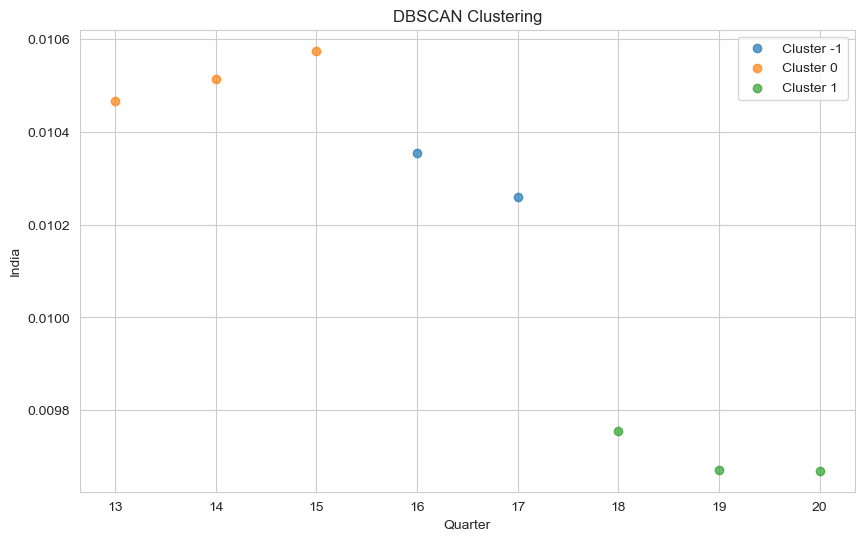

In [43]:
features = ["INR","Quarter"]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_2020_2021[features])
dbscan = DBSCAN(eps=0.5, min_samples=2)  # eps to be changed from 0.3 to 0.75
clusters = dbscan.fit_predict(df_scaled)

df_2020_2021["Cluster"] = clusters

plt.figure(figsize=(10, 6))
for cluster in np.unique(clusters):
    plt.scatter(df_2020_2021[df_2020_2021["Cluster"] == cluster]["Quarter"], df_2020_2021[df_2020_2021["Cluster"] == cluster]["INR"], label=f"Cluster {cluster}", alpha=0.7)
plt.xlabel("Quarter")
plt.ylabel("India")
plt.title("DBSCAN Clustering")
plt.legend()
plt.grid(True)
plt.show()

## PCA

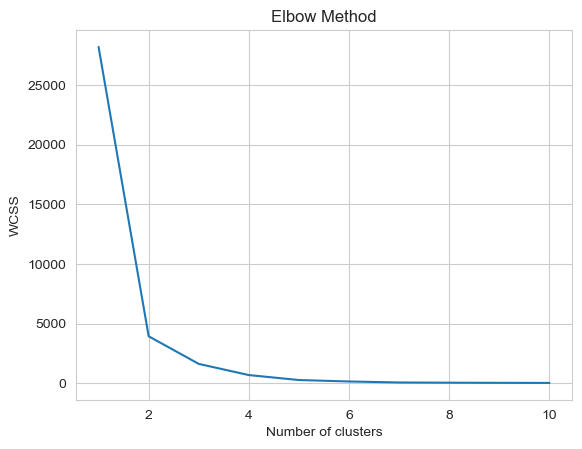

In [61]:
df = merged_df.drop(columns=["Events"])

sdr_values = df.T  # Transpose the DataFrame

# Extract the SDR values (assuming they are numerical values)
# sdr_values = transposed_df.drop(index=['Date'])  # Remove the 'Date' index

# Standardize the SDR values (mean=0, std=1)
scaler = StandardScaler()
scaled_sdr_values = scaler.fit_transform(sdr_values)

# Perform PCA
pca = PCA(n_components=2)  # Specify the number of components (e.g., 2 for 2D visualization)
pca_result = pca.fit_transform(scaled_sdr_values)

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/Users/vishnuudaiyar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



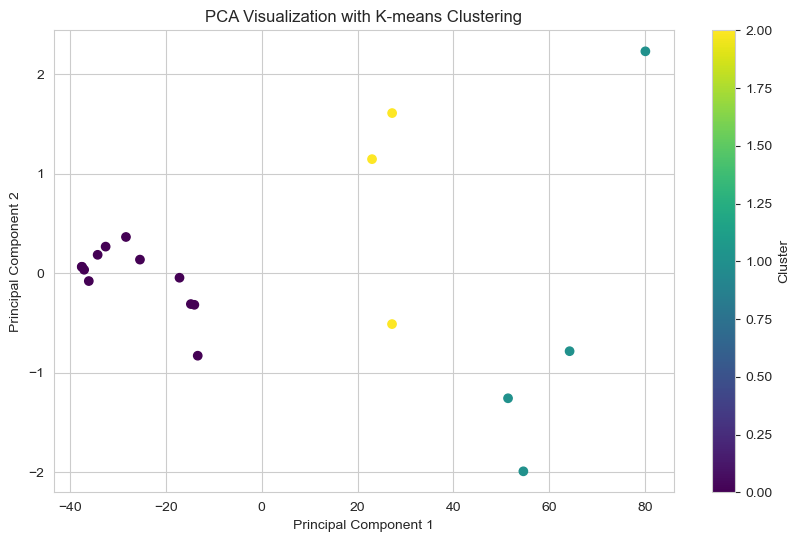

Country: CNY, Cluster Label: 2
Country: EUR, Cluster Label: 0
Country: INR, Cluster Label: 1
Country: ILS, Cluster Label: 0
Country: MYR, Cluster Label: 0
Country: MXN, Cluster Label: 0
Country: NZD, Cluster Label: 0
Country: NOK, Cluster Label: 2
Country: PHP, Cluster Label: 0
Country: QAR, Cluster Label: 0
Country: RUB, Cluster Label: 0
Country: SAR, Cluster Label: 0
Country: SGD, Cluster Label: 0
Country: ZAR, Cluster Label: 2
Country: CHF, Cluster Label: 0
Country: THB, Cluster Label: 1
Country: GBP, Cluster Label: 0
Country: USD, Cluster Label: 1


In [63]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Specify the number of clusters (e.g., 3 clusters)
cluster_labels = kmeans.fit_predict(pca_result)

# Plotting PCA results with clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization with K-means Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

# Print cluster labels for countries
countries = list(transposed_df.iloc[1:,:0].T ) # Assuming the first column is 'Date'
for country, cluster_label in zip(countries, cluster_labels):
    print(f"Country: {country}, Cluster Label: {cluster_label}")

